#### Supervised Learning
*   Model learns from a **labeled dataset**, where each input (feature) has a corresponding known output (label).
*   CTRL + Shift + P (Restart: Python Language Server)  for help to be visible

#### Linear Regression

Predicted price for 1650 sqft: $330838.61


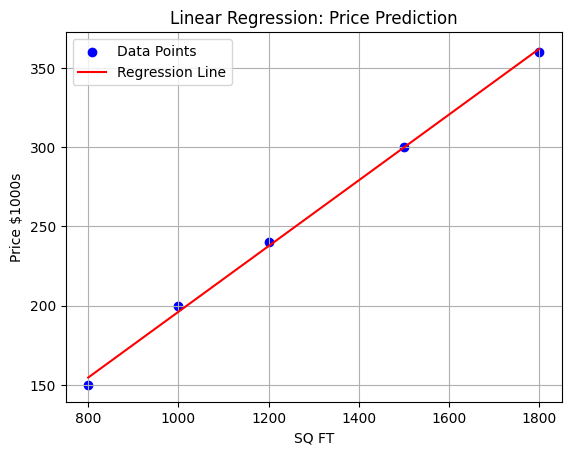

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Mock data: Square footage (X) and price in $1000s (y)
X = np.array([[800], [1000], [1200], [1500], [1800]])
y = np.array([150, 200, 240, 300, 360])

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict price for 1600 sqft
predicted_price = model.predict([[1600], [1650]])
print(f"Predicted price for 1650 sqft: ${predicted_price[1]*1000:.2f}")

# Plot
plt.scatter(X, y, color="Blue", label="Data Points")
plt.plot(X, model.predict(X), color="Red", label="Regression Line")
plt.xlabel("SQ FT")
plt.ylabel("Price $1000s")
plt.title("Linear Regression: Price Prediction")
plt.grid(True)
plt.legend()
plt.show()

#### Linear Classification

Model Classes: [0 1]
Probability of passing after studying 4 hours: 0.50


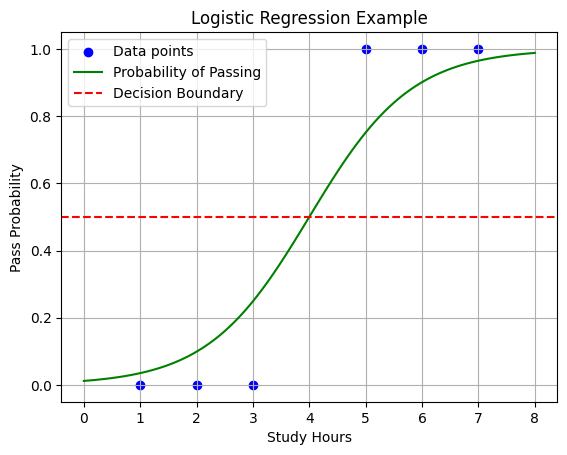

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Mock data: Study hours (X) and Pass(1)/Fail(0) (y)
X = np.array([[1], [2], [3], [5], [6], [7]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probability for a student who studied 4 hours
prob_pass = model.predict_proba([[4]])[0][1]
print(f"Model Classes: {model.classes_}")
print(f"Probability of passing after studying 4 hours: {prob_pass:.2f}")

# Plot
X_test = np.linspace(0, 8, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_test, y_prob, color="green", label="Probability of Passing")
plt.xlabel("Study Hours")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression Example")
plt.axhline(0.5, color="red", linestyle="--", label="Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

#### **Multiclass Logistic Regression**
🧠 Common Solvers in scikit-learn:
| Solver      | Supports                       | Suitable For          | Notes                                         |
| ----------- | ------------------------------ | --------------------- | --------------------------------------------- |
| `liblinear` | Binary / Multiclass (OVR)      | Small datasets        | Does **One-vs-Rest (OvR)** multiclass         |
| `lbfgs`     | Binary & Multiclass (softmax)  | Medium-sized datasets | Supports **multinomial** (i.e., true softmax) |
| `saga`      | Large datasets + L1/L2 penalty | Large datasets        | Can do **sparse data**, **L1 regularization** |
| `newton-cg` | Binary & Multiclass            | Medium-large          | Also supports **multinomial**                 |
| `sag`       | Binary & Multiclass            | Large datasets        | Fast, but only for **L2** penalty             |


In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sample data: weight of fruit
X = np.array([[120], [130], [140], [160], [170], [180]])
y = np.array(["apple", "apple", "apple", "banana", "orange", "orange"])

# Create logistic regression model
# model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
model = LogisticRegression(solver="lbfgs")
model.fit(X, y)

# Check the order of class labels
print("Class order:", model.classes_)

# Predict class probabilities for a fruit weighing 150g
input_weight = [[150]]
probs = model.predict_proba(input_weight)
print(probs)

# Show predicted probabilities
for fruit, prob in zip(model.classes_, probs[0]):
    print(f"Probability of {fruit}: {prob:.2f}")

# Get most probable class
predicted_class = model.predict(input_weight)[0]
print(f"Predicted fruit: {predicted_class}")

Class order: ['apple' 'banana' 'orange']
[[5.09538077e-01 4.90381345e-01 8.05777011e-05]]
Probability of apple: 0.51
Probability of banana: 0.49
Probability of orange: 0.00
Predicted fruit: apple


#### 🧪 Output Thumb Rule
| You input...       | You get...      | To access first sample’s probabilities |
| ------------------ | --------------- | -------------------------------------- |
| `[[x]]` (1 sample) | Shape: `(1, n)` | `probs[0]`                             |
| `[[x1], [x2]]`     | Shape: `(2, n)` | `probs[0]`, `probs[1]`, etc.           |
